In [1]:
##Import the libraries
# Warnings
import warnings
warnings.filterwarnings('ignore')
## math library for mathematical function
import math
## labeled data view in dataframe
import pandas as pd
## data reader od panda is used fetch the data from web
import pandas_datareader as web
## numpy is used to create multi dimensional array
import numpy as np
## tensorflow is uded to create DL model and wrapping the other libraries
import tensorflow as tf
## sklearn is providing ultility functions for standerdizing or scaling data
from sklearn.preprocessing import MinMaxScaler
## keras is a neural network library
from keras.layers import LSTM
from keras.layers import Dense
from keras.models import Sequential
## it is uded to create plotting area
import matplotlib.pyplot as mtlplt
## feature scaling distribution
from matplotlib import rcParams 

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
data_frame = pd.read_csv('/content/drive/My Drive/Colab Notebooks/datasets/GOOGL.csv')



In [11]:
data_frame

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-08-30,17.123123,17.201952,17.021523,17.059059,17.059059,65010924
1,2012-08-31,17.117117,17.231731,17.018019,17.144394,17.144394,84998916
2,2012-09-04,17.130880,17.142141,16.854355,17.043043,17.043043,75508416
3,2012-09-05,17.017017,17.179680,16.995495,17.035034,17.035034,68259672
4,2012-09-06,17.166166,17.514765,17.135386,17.502502,17.502502,121618260
...,...,...,...,...,...,...,...
2510,2022-08-23,113.480003,115.010002,113.430000,113.860001,113.860001,15870400
2511,2022-08-24,113.500000,114.779999,112.870003,113.690002,113.690002,17734600
2512,2022-08-25,114.239998,116.720001,114.110001,116.650002,116.650002,16956800
2513,2022-08-26,114.720001,115.120003,110.190002,110.339996,110.339996,37195500


In [12]:
## Get the number of rows and columns in the data set
data_frame.shape

(2515, 7)

<function matplotlib.pyplot.show(*args, **kw)>

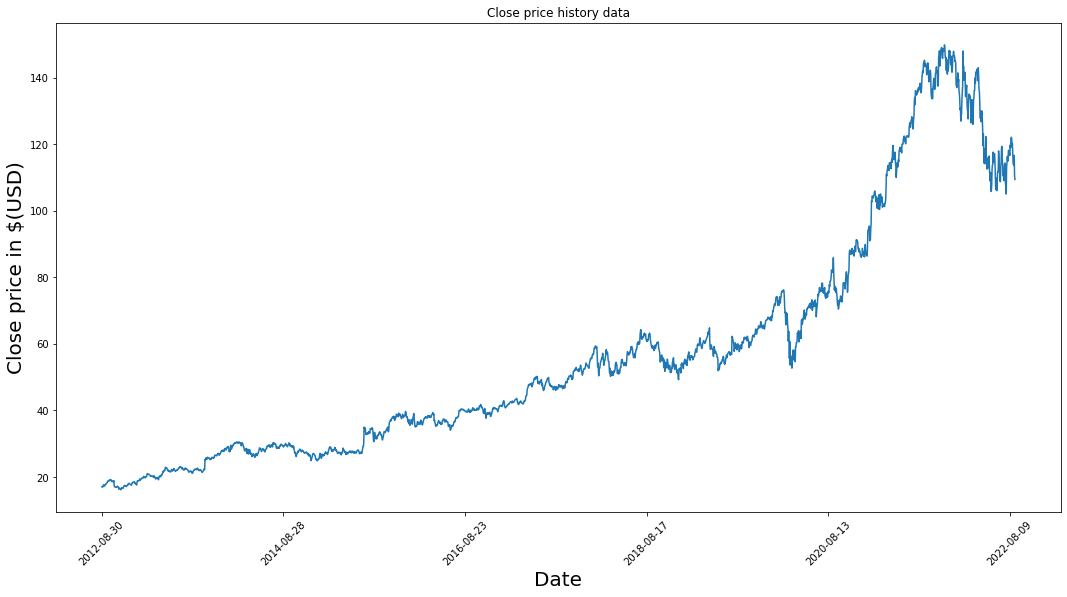

In [13]:
## Visulaizing close price on graph from historical data
mtlplt.figure(figsize=(18,9))
mtlplt.title('Close price history data')
mtlplt.plot(data_frame['Close'])
#plt.plot(range(data_frame.shape[0]),(data_frame['Low']+data_frame['High'])/2.0)
mtlplt.xticks(range(0,data_frame.shape[0],500),data_frame['Date'].loc[::500],rotation=45)
mtlplt.xlabel('Date', fontsize=20)
mtlplt.ylabel('Close price in $(USD)',fontsize=20)
mtlplt.show

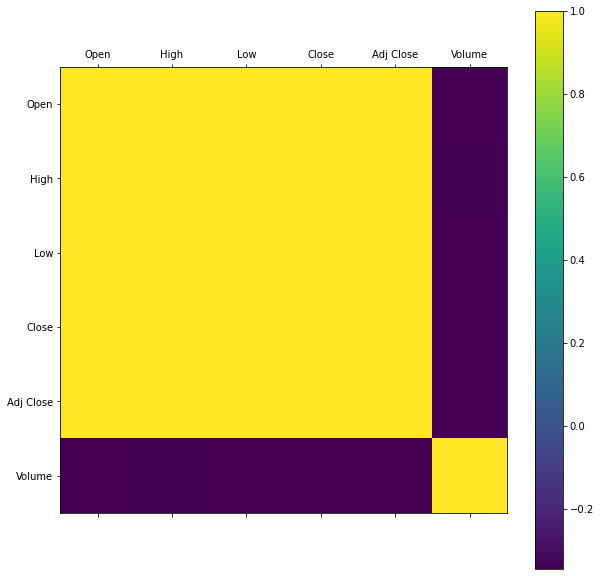

In [14]:
scaling_data_frame = data_frame.filter(['Open','High','Low','Close','Adj Close','Volume'])
## Scaling the features
scaler = MinMaxScaler(feature_range=(0,1))
## Transform the data into
scaled_Data = scaler.fit_transform(scaling_data_frame)
## Display the scaled features into dataframe
scaled_data_frame = pd.DataFrame(data=scaled_Data, index=[data_frame.Date], columns=['Open','High','Low','Close','Adj Close','Volume'] )
## Feature Scaling and visualization of feature distribution
rcParams['figure.figsize'] = 20, 10
mtlplt.matshow(data_frame.corr())
mtlplt.yticks(np.arange(scaled_data_frame.shape[1]), scaled_data_frame.columns)
mtlplt.xticks(np.arange(scaled_data_frame.shape[1]), scaled_data_frame.columns)
mtlplt.colorbar()

In [15]:
## Create a seperate dataframe with only colse column
stock_close_data = data_frame.filter(['Close'])

## Convert created dataframe into numpy array
stock_close_dataset = stock_close_data.values

## Split dataset for training and testing
trainingDataLength = math.ceil( len(stock_close_dataset) * 0.8 )

## Display the training data length
trainingDataLength

2012

In [16]:
## Scaling the data its come under preprocessing stage
## Create feature range into 0,1
scaler = MinMaxScaler(feature_range=(0,1))

## Transform the data into
scaledData = scaler.fit_transform(stock_close_dataset)

## Display scaled data value
scaledData

array([[0.00646023],
       [0.00709876],
       [0.00634039],
       ...,
       [0.75166266],
       [0.7044472 ],
       [0.69756319]])

In [17]:
## Create a new dataset which contain scaled value
StockTrainData = scaledData[0:trainingDataLength , :]

## Spliting the dataset into two parts such as Xtrain and Ytrain datasets
Xtrain = []
Ytrain = []

for i in range(60, len(StockTrainData)):
  Xtrain.append(StockTrainData[i-60:i, 0])
  Ytrain.append(StockTrainData[i, 0])
  if i<= 61:
    print(Xtrain)
    print(Ytrain)
    print()

[array([6.46022807e-03, 7.09875852e-03, 6.34038623e-03, 6.28045782e-03,
       9.77834909e-03, 1.10423079e-02, 1.00348911e-02, 8.42825022e-03,
       8.18295456e-03, 1.10217157e-02, 1.17033162e-02, 1.17594883e-02,
       1.33136984e-02, 1.50401662e-02, 1.51562667e-02, 1.62554355e-02,
       1.91372667e-02, 1.90960598e-02, 1.99012435e-02, 2.04704997e-02,
       2.00959865e-02, 2.14592024e-02, 2.05622517e-02, 2.15940170e-02,
       2.26332723e-02, 2.25583787e-02, 2.07214298e-02, 1.81466933e-02,
       1.82347041e-02, 1.95304865e-02, 1.82702690e-02, 1.75643350e-02,
       1.82609082e-02, 2.02813836e-02, 8.95442893e-03, 6.48082027e-03,
       5.89659877e-03, 6.21118361e-03, 5.64006420e-03, 5.72618930e-03,
       5.23746116e-03, 6.20182284e-03, 7.56689445e-03, 7.62869352e-03,
       6.69991175e-03, 6.46772567e-03, 3.73382615e-03, 9.56864083e-04,
       2.96795626e-03, 3.50537390e-03, 2.22269354e-03, 1.00554609e-03,
       1.49877130e-05, 0.00000000e+00, 3.93792992e-03, 4.26749498e-03,
     

In [18]:
## Convert Xtrain data, Ytrain data into numpy array
Xtrain = np.array(Xtrain)
Ytrain = np.array(Ytrain)

In [19]:
## Reshape the Xtrain data (number of column and number of row)
Xtrain = np.reshape(Xtrain, (Xtrain.shape[0], Xtrain.shape[1], 1))
Xtrain.shape

(1952, 60, 1)

In [20]:
## Develop LSTM model
model = Sequential()

## Assign neurons as 50
neurons = 50

## First LSTM layer
model.add(LSTM(neurons, return_sequences=True, input_shape= (Xtrain.shape[1], 1))) 

## Second LSTM layer, no more layer for lstm so return_sequence is false
model.add(LSTM(neurons, return_sequences= False)) 

## Adding Dense layer which always have 25 neurons by default
model.add(Dense(25)) 
model.add(Dense(1))

In [21]:
##Compile  model
## mse= mean squared error
model.compile(optimizer='adam', loss='mse') 

In [22]:
## Fiting model with given training dataset
history_data = model.fit(Xtrain, Ytrain, batch_size=50, epochs=200, verbose=2, validation_split=0.2)

Epoch 1/200
32/32 - 5s - loss: 0.0028 - val_loss: 5.9123e-04 - 5s/epoch - 171ms/step
Epoch 2/200
32/32 - 1s - loss: 1.3578e-04 - val_loss: 4.2665e-04 - 1s/epoch - 47ms/step
Epoch 3/200
32/32 - 1s - loss: 9.4695e-05 - val_loss: 4.1014e-04 - 1s/epoch - 47ms/step
Epoch 4/200
32/32 - 1s - loss: 8.8605e-05 - val_loss: 4.3374e-04 - 1s/epoch - 46ms/step
Epoch 5/200
32/32 - 2s - loss: 8.9289e-05 - val_loss: 3.9584e-04 - 2s/epoch - 47ms/step
Epoch 6/200
32/32 - 1s - loss: 8.5374e-05 - val_loss: 4.7371e-04 - 1s/epoch - 47ms/step
Epoch 7/200
32/32 - 1s - loss: 9.3482e-05 - val_loss: 5.1504e-04 - 1s/epoch - 47ms/step
Epoch 8/200
32/32 - 1s - loss: 9.4874e-05 - val_loss: 4.0723e-04 - 1s/epoch - 47ms/step
Epoch 9/200
32/32 - 1s - loss: 8.3172e-05 - val_loss: 3.7271e-04 - 1s/epoch - 46ms/step
Epoch 10/200
32/32 - 1s - loss: 8.2302e-05 - val_loss: 3.4895e-04 - 1s/epoch - 46ms/step
Epoch 11/200
32/32 - 2s - loss: 8.8450e-05 - val_loss: 3.4322e-04 - 2s/epoch - 48ms/step
Epoch 12/200
32/32 - 2s - loss: 7

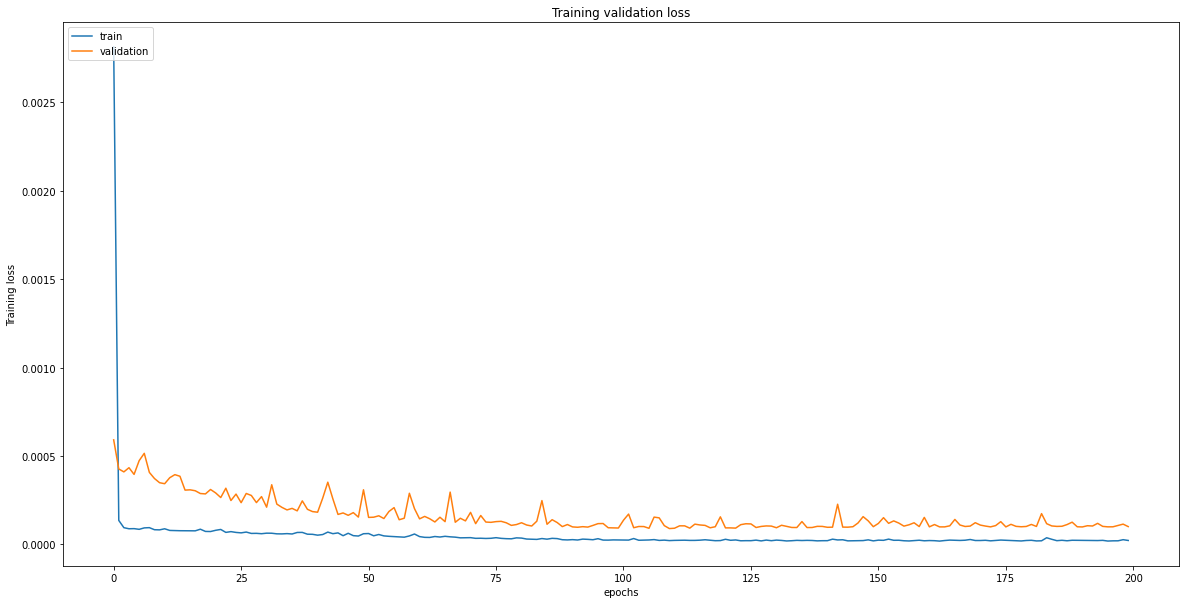

In [23]:
## Visualize train and validation loss
mtlplt.figure(figsize=(20,10))
mtlplt.title('Training validation loss')
mtlplt.plot(history_data.history['loss'])
mtlplt.plot(history_data.history['val_loss'])
mtlplt.ylabel('Training loss')
mtlplt.xlabel('epochs')
mtlplt.legend(['train' , 'validation'], loc = 'upper left')
mtlplt.show()

In [24]:
##Create testing dataset, new array which contains scaled value from 2275 out of 2843
testingData = scaledData[trainingDataLength - 60: , :]

## Create dataset Xtest and Ytest
Xtest = []
Ytest = stock_close_dataset[trainingDataLength:, :]
for i in range(60, len(testingData)):
  Xtest.append(testingData[i-60:i, 0])

In [25]:
## Convert data into numpy array
Xtest = np.array(Xtest)
Xtest

array([[0.41757058, 0.42057112, 0.42208258, ..., 0.49393457, 0.48809442,
        0.49217615],
       [0.42057112, 0.42208258, 0.42680416, ..., 0.48809442, 0.49217615,
        0.48847228],
       [0.42208258, 0.42680416, 0.40330869, ..., 0.49217615, 0.48847228,
        0.49803132],
       ...,
       [0.73005281, 0.73102553, 0.75893949, ..., 0.73362948, 0.73078611,
        0.72951407],
       [0.73102553, 0.75893949, 0.73588177, ..., 0.73078611, 0.72951407,
        0.75166266],
       [0.75893949, 0.73588177, 0.75293845, ..., 0.72951407, 0.75166266,
        0.7044472 ]])

In [26]:
## Reshape data from 2 Dimensional to 3 Dimensional
Xtest = np.reshape(Xtest, (Xtest.shape[0], Xtest.shape[1], 1 ))

In [27]:
## Get predicted stock price value
## Unscaling the predicted value
predictions = model.predict(Xtest)
predictions = scaler.inverse_transform(predictions)
predictions

array([[ 82.245094],
       [ 81.25845 ],
       [ 83.08528 ],
       [ 86.43682 ],
       [ 80.43156 ],
       [ 78.98466 ],
       [ 75.45981 ],
       [ 77.77513 ],
       [ 76.090935],
       [ 76.22953 ],
       [ 75.778015],
       [ 77.52378 ],
       [ 75.814445],
       [ 74.76818 ],
       [ 72.69305 ],
       [ 71.82429 ],
       [ 73.64851 ],
       [ 70.42809 ],
       [ 71.96704 ],
       [ 72.41132 ],
       [ 73.62618 ],
       [ 73.81445 ],
       [ 73.74314 ],
       [ 74.95574 ],
       [ 72.74596 ],
       [ 74.75402 ],
       [ 72.32808 ],
       [ 73.3995  ],
       [ 74.45211 ],
       [ 75.96801 ],
       [ 78.93115 ],
       [ 78.51547 ],
       [ 78.40673 ],
       [ 77.74584 ],
       [ 78.52344 ],
       [ 76.067154],
       [ 77.90324 ],
       [ 79.51742 ],
       [ 80.639275],
       [ 82.06651 ],
       [ 78.8068  ],
       [ 80.36228 ],
       [ 74.53083 ],
       [ 78.67817 ],
       [ 81.12893 ],
       [ 81.5727  ],
       [ 82.850525],
       [ 88.5

In [28]:
## Get RSME(Root Mean Squared Error) it nearl to 5, then it will be best model
rmse=np.sqrt(np.mean(((predictions- Ytest)**2)))
rmse

2.560878623810152

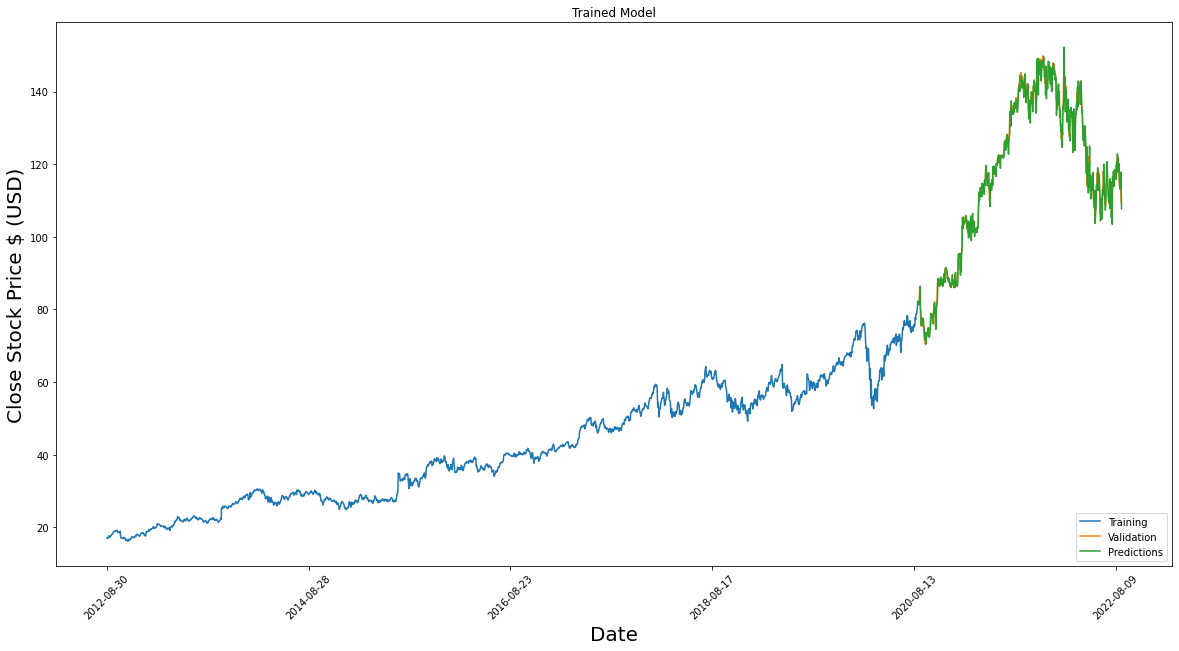

In [29]:
## Ploting data to graph train and validation
training = stock_close_data[:trainingDataLength]
validation = stock_close_data[trainingDataLength:]
validation['Predictions'] = predictions

## Visualize trainning, validating and predicting values in graph
mtlplt.figure(figsize=(20,10))
mtlplt.title('Trained Model')
mtlplt.xticks(range(0,data_frame.shape[0],500),data_frame['Date'].loc[::500],rotation=45)
mtlplt.xlabel('Date', fontsize=20)
mtlplt.ylabel('Close Stock Price $ (USD)', fontsize=20)
mtlplt.plot(training['Close'])
mtlplt.plot(validation[['Close', 'Predictions']])
mtlplt.legend(['Training', 'Validation', 'Predictions'], loc='lower right')
mtlplt.show()

In [55]:
## Get quote on google
googleQuote = pdr.get_data_yahoo("GOOGL", start="2012-01-01", end="2022-04-30")

[*********************100%***********************]  1 of 1 completed


In [56]:
## Creating a new dataframe
new_data_frame = googleQuote.filter(['Close'])

## Get the last sixty day closing stock price values and converting the dataframe into an array
last60Days = new_data_frame[-60:].values

##Scale the data to be values between 0 and 1
last60Days_scaled = scaler.transform(last60Days)

##Creating an empty test list
X_test_data = []

##Append the past 60 days
X_test_data.append(last60Days_scaled)

##Converting the X_test_data into a numpy array
X_test_data = np.array(X_test_data)

## Reshape data from 2 Dimensionsal to 3 Dimensional
X_test_data = np.reshape(X_test_data, (X_test_data.shape[0], X_test_data.shape[1], 1))

## Get predicted scaled stock price
predicted_price = model.predict(X_test_data)

## Unscaling the predicted value
predicted_price = scaler.inverse_transform(predicted_price)

## Display the pridicted price for next day
print(predicted_price)

[[112.06074]]


RMSE:  3.0936970595172824
R2 score:  0.4581173581223107


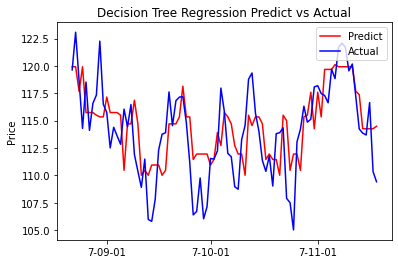

In [25]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=0)

benchmark_dt=dt.fit(X_train, y_train)

validate_result(benchmark_dt, 'Decision Tree Regression')

In [31]:
y_pred_test_lstm = model_lstm.predict(X_tst_t)
y_train_pred_lstm = model_lstm.predict(X_tr_t)
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred_lstm)))
r2_train = r2_score(y_train, y_train_pred_lstm)

print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_pred_test_lstm)))
r2_test = r2_score(y_test, y_pred_test_lstm)

The R2 score on the Train set is:	0.998
The R2 score on the Test set is:	0.763


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3465f33ed0>,
      dtype=object)

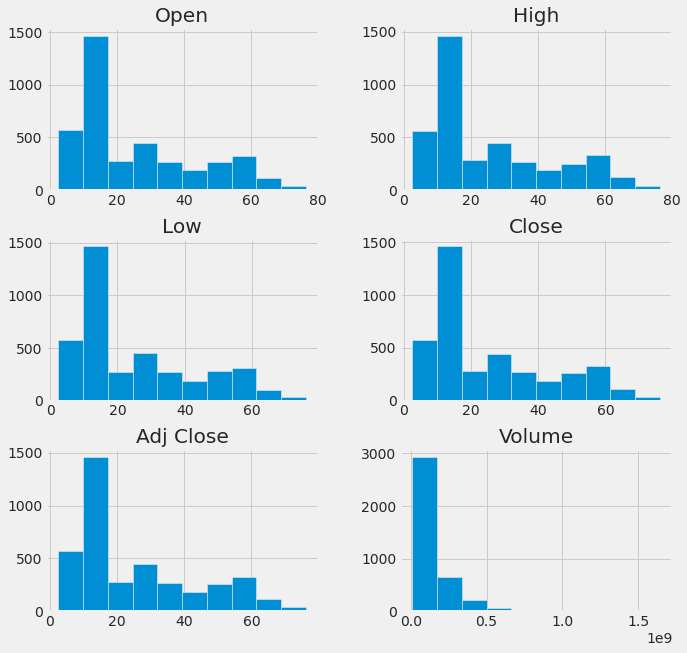

In [280]:
df.hist(figsize = (10,10))

In [281]:
print(df['Close'].skew())
Cskew = np.log(df['Close'])
print(Cskew.skew())

print(df['Volume'].skew())
vskew = np.log(df['Volume'])
print(vskew.skew())

0.8774885215001579
-0.07087200537956481
3.1059937879605135
0.2875054266529349


In [282]:
df['OC_Change'] = (df['Close']-df['Open'])/df['Open']*100

In [283]:
df['HL_Change'] = (df['High']-df['Low'])/df['Low']*100

In [284]:
df = df[['Close','HL_Change','OC_Change','Volume']]

In [285]:
Close1 = df['Close'][-41:-1]
print(Close1)
len(Close1)
Close2 = Close1.to_numpy()
print(Close2)

Date
2020-02-28    66.962502
2020-03-02    69.316002
2020-03-03    66.886002
2020-03-04    69.080002
2020-03-05    65.737999
2020-03-06    64.787003
2020-03-09    60.789501
2020-03-10    63.758499
2020-03-11    60.544998
2020-03-12    55.577499
2020-03-13    60.713501
2020-03-16    53.650002
2020-03-17    55.903000
2020-03-18    54.559502
2020-03-19    55.583500
2020-03-20    53.410500
2020-03-23    52.706501
2020-03-24    56.500500
2020-03-25    55.081001
2020-03-26    58.146000
2020-03-27    55.513000
2020-03-30    57.315498
2020-03-31    58.097500
2020-04-01    55.105000
2020-04-02    55.851501
2020-04-03    54.634998
2020-04-06    59.159500
2020-04-07    59.127998
2020-04-08    60.349998
2020-04-09    60.328499
2020-04-13    60.520500
2020-04-14    63.261501
2020-04-15    62.865002
2020-04-16    62.871498
2020-04-17    63.950001
2020-04-20    63.057499
2020-04-21    60.608002
2020-04-22    62.920502
2020-04-23    63.558498
2020-04-24    63.830002
Name: Close, dtype: float64
[66.962

In [286]:
forecast_Col = 'Close'
forecast_out = int(math.ceil(0.01*len(df)))
df['label'] = df[forecast_Col].shift(-forecast_out)
print(df['label'])

Date
2004-08-19    3.606356
2004-08-20    3.732733
2004-08-23    3.702202
2004-08-24    3.515766
2004-08-25    3.738238
                ...   
2020-04-21         NaN
2020-04-22         NaN
2020-04-23         NaN
2020-04-24         NaN
2020-04-27         NaN
Name: label, Length: 3949, dtype: float64


In [289]:
X  =  np.array(df.drop(['label'], axis = 1))
Y  =  np.array(df['label'])

In [290]:
print(len(X),len(Y))

3909 3909


#Data Splitting

In [291]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split


In [292]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X,Y,test_size = 0.2)

In [293]:
a = np.shape(X_train)
b = np.shape(Y_train)
c = np.shape(X_test)
d = np.shape(Y_test)
print(a,b,c,d)

(3127, 4) (3127,) (782, 4) (782,)


In [294]:
import math,datetime
import time

In [295]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression

#Linear Regression

In [296]:
startlr = time.time()

lr = LinearRegression()
lr.fit(X_train,Y_train)

endlr = time.time()

time_lr = endlr-startlr

print('Training Time :- {}'.format(time_lr))

Training Time :- 0.0035042762756347656


In [297]:
accuracy = lr.score(X_test,Y_test)
print(accuracy)

0.9755450810912497


In [298]:
len(Y_test)

782

In [299]:
X = X[:-forecast_out]
X_old = X[-forecast_out:]

Forecast_set = lr.predict(X_old)
print(Forecast_set)

[64.73490934 64.86068869 64.83060381 65.51631321 65.69169609 65.20685996
 65.11162681 65.09579145 65.68288644 66.86692726 66.21517673 65.87936471
 65.30577795 65.24492506 64.92729264 65.54305614 65.92329849 65.89027061
 65.51140763 64.66398415 64.98599067 66.15393539 66.5922014  67.19903231
 67.34502039 67.39116027 67.46736019 67.63718234 67.56939942 68.25280943
 67.94950726 67.83818145 68.05473453 67.73384606 67.76423926 67.49271773
 68.33690221 67.95424747 67.20425795 67.23373636]


In [300]:
date= ['2022-03-03','2022-03-04','2022-03-05','2022-03-06','2022-03-09','2022-03-10','2022-03-11','2022-03-12','2022-03-13','2022-03-16',
       '2022-03-17','2022-03-18','2022-03-19','2022-03-20','2022-03-23','2022-03-24','2022-03-25','2022-03-26','2022-03-27','2022-03-30',
       '2022-03-31','2022-04-01','2022-04-02','2022-04-03','2022-04-06','2022-04-07','2022-04-08','2022-04-09','2022-04-13','2022-04-14',
       '2022-04-15','2022-04-16','2022-04-17','2022-04-20','2022-04-21','2022-04-22','2022-04-23','2022-04-24','2022-04-27','2022-04-28',]
cl = np.array(Close2)
pr = np.array(Forecast_set)
dataset11 = pd.DataFrame({'Date': date, 'Close': cl, 'Prediction': pr}, columns=['Date', 'Close', 'Prediction'])
print(dataset11)
print(dataset11.tail(10))

          Date      Close  Prediction
0   2022-03-03  66.962502   64.734909
1   2022-03-04  69.316002   64.860689
2   2022-03-05  66.886002   64.830604
3   2022-03-06  69.080002   65.516313
4   2022-03-09  65.737999   65.691696
5   2022-03-10  64.787003   65.206860
6   2022-03-11  60.789501   65.111627
7   2022-03-12  63.758499   65.095791
8   2022-03-13  60.544998   65.682886
9   2022-03-16  55.577499   66.866927
10  2022-03-17  60.713501   66.215177
11  2022-03-18  53.650002   65.879365
12  2022-03-19  55.903000   65.305778
13  2022-03-20  54.559502   65.244925
14  2022-03-23  55.583500   64.927293
15  2022-03-24  53.410500   65.543056
16  2022-03-25  52.706501   65.923298
17  2022-03-26  56.500500   65.890271
18  2022-03-27  55.081001   65.511408
19  2022-03-30  58.146000   64.663984
20  2022-03-31  55.513000   64.985991
21  2022-04-01  57.315498   66.153935
22  2022-04-02  58.097500   66.592201
23  2022-04-03  55.105000   67.199032
24  2022-04-06  55.851501   67.345020
25  2022-04-

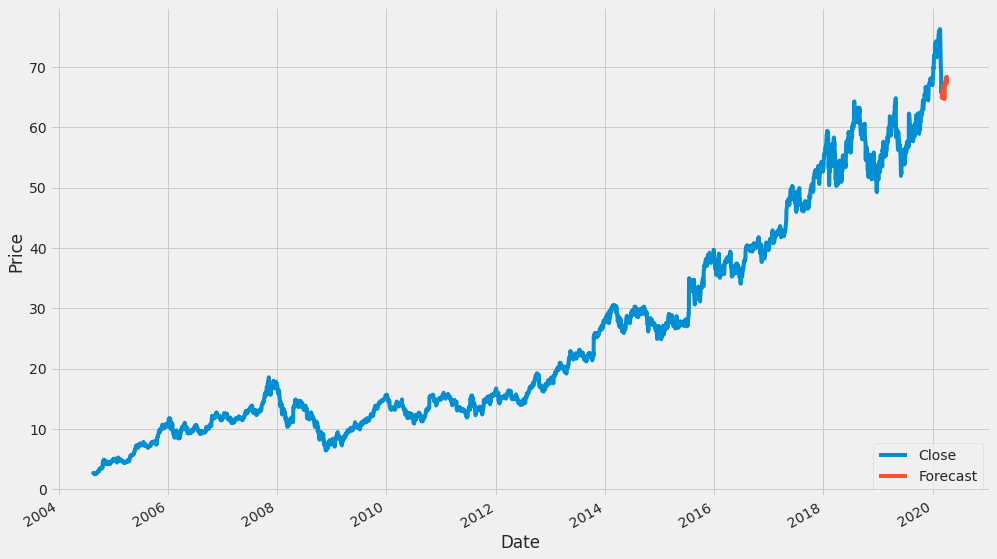

In [301]:
df['Forecast'] = np.nan
last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

for i in Forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += one_day
    df.loc[next_date] = [np.nan for _ in range(len(df.columns) - 1)] + [i]

df['Close'].plot(figsize = (15,10))
df['Forecast'].plot(figsize = (15,10))
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

#Decision tree

In [302]:
startdt = time.time()

tree = DecisionTreeRegressor( max_depth=5)
tree.fit(X_train, Y_train)

enddt = time.time()

time_dt = enddt-startdt

print('Training Time :- {}'.format(time_dt))

print('Accuracy:- {}'.format(tree.score(X_test, Y_test)))

Training Time :- 0.01261591911315918
Accuracy:- 0.9810764180625319


In [303]:
X = X[:-forecast_out]
X_old = X[-forecast_out:]

Forecast_set = tree.predict(X_old)
print(Forecast_set)

[57.9764108  57.9764108  57.9764108  66.43657248 66.43657248 57.9764108
 57.9764108  66.43657248 66.43657248 57.9764108  66.43657248 57.9764108
 66.43657248 66.43657248 57.9764108  57.9764108  57.9764108  57.9764108
 57.9764108  57.9764108  57.9764108  57.9764108  57.9764108  57.9764108
 57.9764108  57.9764108  66.43657248 66.43657248 66.43657248 66.43657248
 66.43657248 66.43657248 66.43657248 66.43657248 66.43657248 66.43657248
 66.43657248 66.43657248 66.43657248 66.43657248]


In [304]:
date= ['2022-03-03','2022-03-04','2022-03-05','2022-03-06','2022-03-09','2022-03-10','2022-03-11','2022-03-12','2022-03-13','2022-03-16',
       '2022-03-17','2022-03-18','2022-03-19','2022-03-20','2022-03-23','2022-03-24','2022-03-25','2022-03-26','2022-03-27','2022-03-30',
       '2022-03-31','2022-04-01','2022-04-02','2022-04-03','2022-04-06','2022-04-07','2022-04-08','2022-04-09','2022-04-13','2022-04-14',
       '2022-04-15','2022-04-16','2022-04-17','2022-04-20','2022-04-21','2022-04-22','2022-04-23','2022-04-24','2022-04-27','2022-04-28',]
cl = np.array(Close2)
pr = np.array(Forecast_set)
dataset11 = pd.DataFrame({'Date': date, 'Close': cl, 'Prediction': pr}, columns=['Date', 'Close', 'Prediction'])
print(dataset11)
print(dataset11.tail(10))

          Date      Close  Prediction
0   2022-03-03  66.962502   57.976411
1   2022-03-04  69.316002   57.976411
2   2022-03-05  66.886002   57.976411
3   2022-03-06  69.080002   66.436572
4   2022-03-09  65.737999   66.436572
5   2022-03-10  64.787003   57.976411
6   2022-03-11  60.789501   57.976411
7   2022-03-12  63.758499   66.436572
8   2022-03-13  60.544998   66.436572
9   2022-03-16  55.577499   57.976411
10  2022-03-17  60.713501   66.436572
11  2022-03-18  53.650002   57.976411
12  2022-03-19  55.903000   66.436572
13  2022-03-20  54.559502   66.436572
14  2022-03-23  55.583500   57.976411
15  2022-03-24  53.410500   57.976411
16  2022-03-25  52.706501   57.976411
17  2022-03-26  56.500500   57.976411
18  2022-03-27  55.081001   57.976411
19  2022-03-30  58.146000   57.976411
20  2022-03-31  55.513000   57.976411
21  2022-04-01  57.315498   57.976411
22  2022-04-02  58.097500   57.976411
23  2022-04-03  55.105000   57.976411
24  2022-04-06  55.851501   57.976411
25  2022-04-

KNN

In [320]:
startknn = time.time()

knn = KNeighborsRegressor(13)
knn.fit(X_train, Y_train)

endknn = time.time()

time_knn = endknn - startknn

print('Training Time:- {}'.format(time_knn))
print('Accuracy:- {}'.format(knn.score(X_test, Y_test)))

Training Time:- 0.005551576614379883
Accuracy:- 0.6958448028907929


In [321]:
X = X[:-forecast_out]
X_old = X[-forecast_out:]

Forecast_set = knn.predict(X_old)
print(Forecast_set)

[51.13873086 51.05188428 47.26849996 54.23276931 45.82946146 53.97180851
 51.23830795 57.02688423 43.62276943 38.78027432 14.62223618 42.12807626
 51.84392342 43.04003818 49.3473075  43.14342748 34.93237363 43.97488491
 50.62542299 42.27076971 55.46992287 48.7751927  46.2981538  49.3473075
 46.8868461  50.07811546 50.46742293 54.20692268 53.57688449 55.12311495
 44.88880774 51.05188428 53.68292324 57.76815326 54.02026925 53.52653768
 50.01873104 50.39588429 46.87526982 51.94119263]


In [322]:
date= ['2022-03-03','2022-03-04','2022-03-05','2022-03-06','2022-03-09','2022-03-10','2022-03-11','2022-03-12','2022-03-13','2022-03-16',
       '2022-03-17','2022-03-18','2022-03-19','2022-03-20','2022-03-23','2022-03-24','2022-03-25','2022-03-26','2022-03-27','2022-03-30',
       '2022-03-31','2022-04-01','2022-04-02','2022-04-03','2022-04-06','2022-04-07','2022-04-08','2022-04-09','2022-04-13','2022-04-14',
       '2022-04-15','2022-04-16','2022-04-17','2022-04-20','2022-04-21','2022-04-22','2022-04-23','2022-04-24','2022-04-27','2022-04-28',]
cl = np.array(Close2)
pr = np.array(Forecast_set)
dataset11 = pd.DataFrame({'Date': date, 'Close': cl, 'Prediction': pr}, columns=['Date', 'Close', 'Prediction'])
print(dataset11)
print(dataset11.tail(10))

          Date      Close  Prediction
0   2022-03-03  66.962502   51.138731
1   2022-03-04  69.316002   51.051884
2   2022-03-05  66.886002   47.268500
3   2022-03-06  69.080002   54.232769
4   2022-03-09  65.737999   45.829461
5   2022-03-10  64.787003   53.971809
6   2022-03-11  60.789501   51.238308
7   2022-03-12  63.758499   57.026884
8   2022-03-13  60.544998   43.622769
9   2022-03-16  55.577499   38.780274
10  2022-03-17  60.713501   14.622236
11  2022-03-18  53.650002   42.128076
12  2022-03-19  55.903000   51.843923
13  2022-03-20  54.559502   43.040038
14  2022-03-23  55.583500   49.347307
15  2022-03-24  53.410500   43.143427
16  2022-03-25  52.706501   34.932374
17  2022-03-26  56.500500   43.974885
18  2022-03-27  55.081001   50.625423
19  2022-03-30  58.146000   42.270770
20  2022-03-31  55.513000   55.469923
21  2022-04-01  57.315498   48.775193
22  2022-04-02  58.097500   46.298154
23  2022-04-03  55.105000   49.347307
24  2022-04-06  55.851501   46.886846
25  2022-04-

#Neural network implementation

In [308]:
dfl

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-08-20,16.904404,16.988739,16.833332,16.905405,16.905405,70253676
2012-08-21,16.844595,16.966967,16.570822,16.754505,16.754505,88799112
2012-08-22,16.701200,17.032032,16.684183,16.946445,16.946445,76291632
2012-08-23,16.873625,17.029030,16.791792,16.936937,16.936937,71296632
2012-08-24,16.906906,17.028278,16.868870,16.982733,16.982733,57006936
...,...,...,...,...,...,...
2022-08-22,115.199997,115.629997,113.849998,114.239998,114.239998,21456600
2022-08-23,113.480003,115.010002,113.430000,113.860001,113.860001,15870400
2022-08-24,113.500000,114.779999,112.870003,113.690002,113.690002,17734600


In [310]:
dfl.shape

(2522, 6)

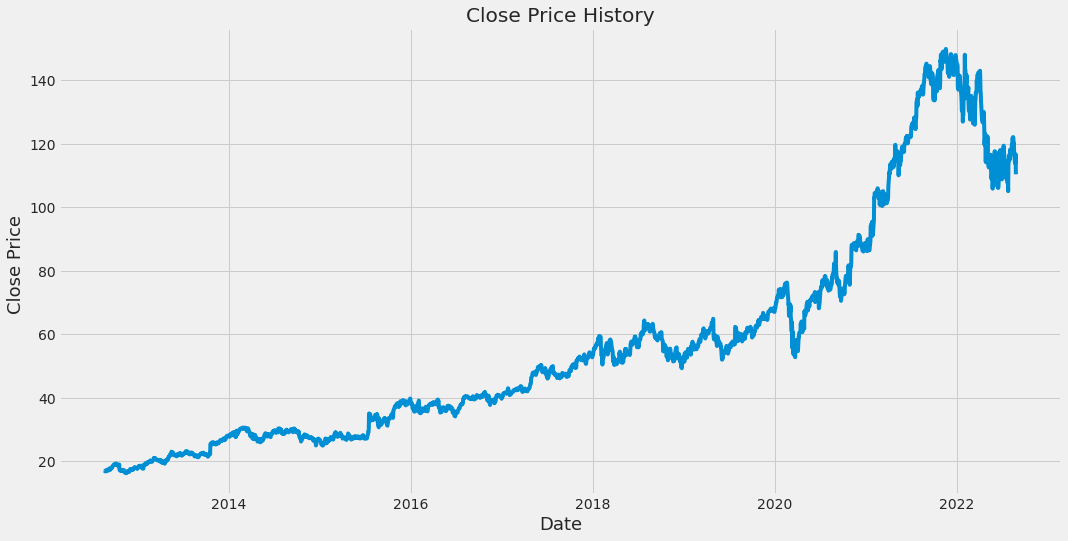

In [323]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(dfl['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price ', fontsize=18)
plt.show()

In [324]:
data = dfl.filter(['Close'])
dataset = data.values
training_data_len = math.ceil( len(dataset) * .8 )
training_data_len

2018

In [325]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00531049],
       [0.00418136],
       [0.00561758],
       ...,
       [0.72951407],
       [0.75166265],
       [0.7044472 ]])

In [326]:
train_data = scaled_data[0:training_data_len , :]

x_trainl = []
y_trainl = []

for i in range(60, len(train_data)):
    x_trainl.append(train_data[i-60:i, 0])
    y_trainl.append(train_data[i, 0])
    if i<= 61:
        print(x_trainl)
        print(y_trainl)
        print()

[array([0.00531049, 0.00418136, 0.00561758, 0.00554644, 0.00588911,
       0.00412706, 0.0056307 , 0.00764553, 0.00646023, 0.00709876,
       0.00634039, 0.00628046, 0.00977835, 0.01104231, 0.01003489,
       0.00842825, 0.00818296, 0.01102171, 0.01170332, 0.01175949,
       0.0133137 , 0.01504016, 0.01515627, 0.01625544, 0.01913727,
       0.01909606, 0.01990125, 0.0204705 , 0.02009599, 0.02145921,
       0.02056225, 0.02159402, 0.02263328, 0.02255838, 0.02072143,
       0.01814669, 0.01823471, 0.01953049, 0.01827027, 0.01756434,
       0.01826091, 0.02028138, 0.00895443, 0.00648082, 0.0058966 ,
       0.00621118, 0.00564006, 0.00572619, 0.00523746, 0.00620182,
       0.00756689, 0.00762869, 0.00669991, 0.00646772, 0.00373382,
       0.00095687, 0.00296796, 0.00350537, 0.00222269, 0.00100555])]
[1.4985588359675561e-05]

[array([0.00531049, 0.00418136, 0.00561758, 0.00554644, 0.00588911,
       0.00412706, 0.0056307 , 0.00764553, 0.00646023, 0.00709876,
       0.00634039, 0.00628046, 0

In [327]:
x_trainl, y_trainl = np.array(x_trainl), np.array(y_trainl)

In [328]:
x_trainl = np.reshape(x_trainl, (x_trainl.shape[0], x_trainl.shape[1], 1))
x_trainl.shape

(1958, 60, 1)

# Build the LSTM model

In [329]:
model = Sequential()

model.add(LSTM(50, return_sequences=True, input_shape= (x_trainl.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 60, 50)            10400     
                                                                 
 lstm_6 (LSTM)               (None, 50)                20200     
                                                                 
 dense_5 (Dense)             (None, 25)                1275      
                                                                 
 dense_6 (Dense)             (None, 1)                 26        
                                                                 
Total params: 31,901
Trainable params: 31,901
Non-trainable params: 0
_________________________________________________________________
None


In [330]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [332]:
model.save("test_123.h5")

In [333]:
import keras
from keras.models import load_model
from tensorflow.keras.models import load_model
new_model = load_model('test_123.h5')

In [334]:
new_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 60, 50)            10400     
                                                                 
 lstm_6 (LSTM)               (None, 50)                20200     
                                                                 
 dense_5 (Dense)             (None, 25)                1275      
                                                                 
 dense_6 (Dense)             (None, 1)                 26        
                                                                 
Total params: 31,901
Trainable params: 31,901
Non-trainable params: 0
_________________________________________________________________


In [335]:
test_data = scaled_data[training_data_len - 60: , :]

x_testl = []
y_testl = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_testl.append(test_data[i-60:i, 0])


In [336]:
x_testl = np.array(x_testl)

In [337]:
x_testl = np.reshape(x_testl, (x_testl.shape[0], x_testl.shape[1], 1 ))

In [338]:
predictionsl = model.predict(x_testl)
predictionsl = scaler.inverse_transform(predictionsl)

In [339]:
#Get the root mean squared error (RMSE)
rmse=np.sqrt(np.mean(((predictionsl - y_testl)**2)))
rmse

2.5347493406228803

In [340]:
from sklearn.metrics import mean_squared_error
rr = mean_squared_error(y_testl, predictionsl)
#mse = sklearn.metrics.mean_squared_error(y_testl, predictionsl)

rmse1 = math.sqrt(rr)

print(rmse1)

2.5347493406228803


In [341]:
#Visualizing Results of LSTM Model

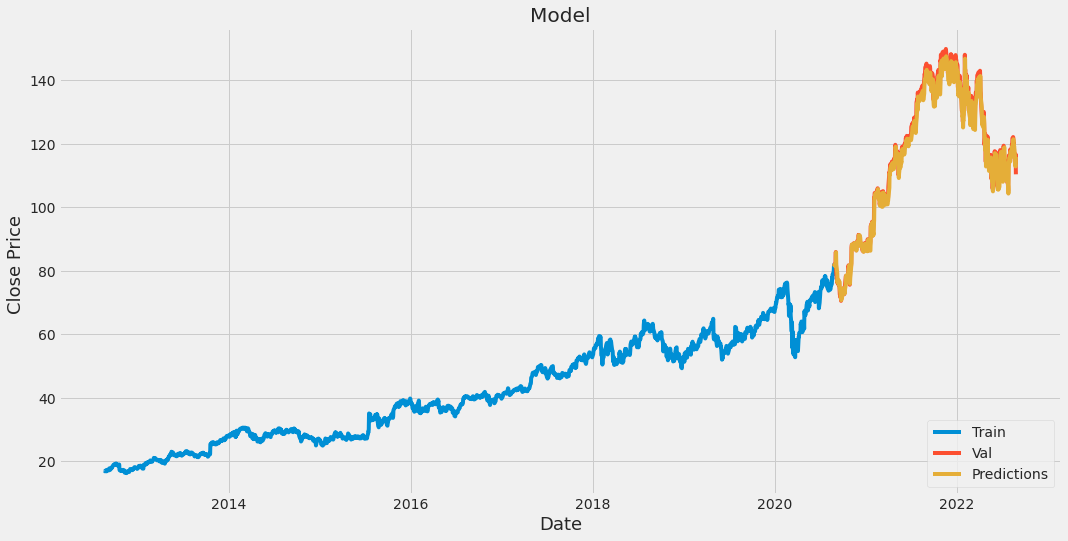

In [342]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictionsl
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price ', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [343]:
valid

,Close,Predictions
Date,,
2020-08-27,81.426003,82.145729
2020-08-28,81.971497,81.556778
2020-08-31,81.476501,81.963593
2020-09-01,82.753998,81.526207
2020-09-02,85.869499,82.680923
...,...,...
2022-08-22,114.239998,116.316933
2022-08-23,113.860001,113.282761
2022-08-24,113.690002,112.906281


In [344]:
valid.tail(10)

,Close,Predictions
Date,,
2022-08-15,122.080002,120.983330
2022-08-16,121.699997,121.388557
2022-08-17,119.550003,120.916061
2022-08-18,120.169998,118.675682
2022-08-19,117.209999,119.274841
2022-08-22,114.239998,116.316933
2022-08-23,113.860001,113.282761
2022-08-24,113.690002,112.906281
2022-08-25,116.650002,112.809746


In [345]:
lstm_temp_pred = valid[['Predictions']].tail(40)
lstm_temp_ori = valid[['Close']].tail(40)

In [346]:
lstm_temp_pred.reset_index(drop=True, inplace=True)
lstm_temp_ori.reset_index(drop=True, inplace=True)

In [347]:
lstm_temp_pred = lstm_temp_pred.values.tolist()
lstm_temp_ori = lstm_temp_ori.values.tolist()

In [348]:
lstm = []
original = []
for i in range(40):
    lstm.append(lstm_temp_pred[i][-1])
    original.append(lstm_temp_ori[i][-1])

# lstm = []
# original = []
# for i in range(30):
#     lstm.append(lstm_temp_pred[i][-1])
#     original.append(lstm_temp_ori[i][-1])

#Visualizing Result of Supervised Learning algorithms

In [352]:
days = [int(i) for i in range(30)]

predictions = {'Original':original[:30],
               'Linear Regression':lr.predict(X_old)[:30],
              'KNN':knn.predict(X_old)[:30],
              'Decision Tree':tree.predict(X_old)[:30],
              'LSTM':lstm[:30]}

predictions = pd.DataFrame(predictions)

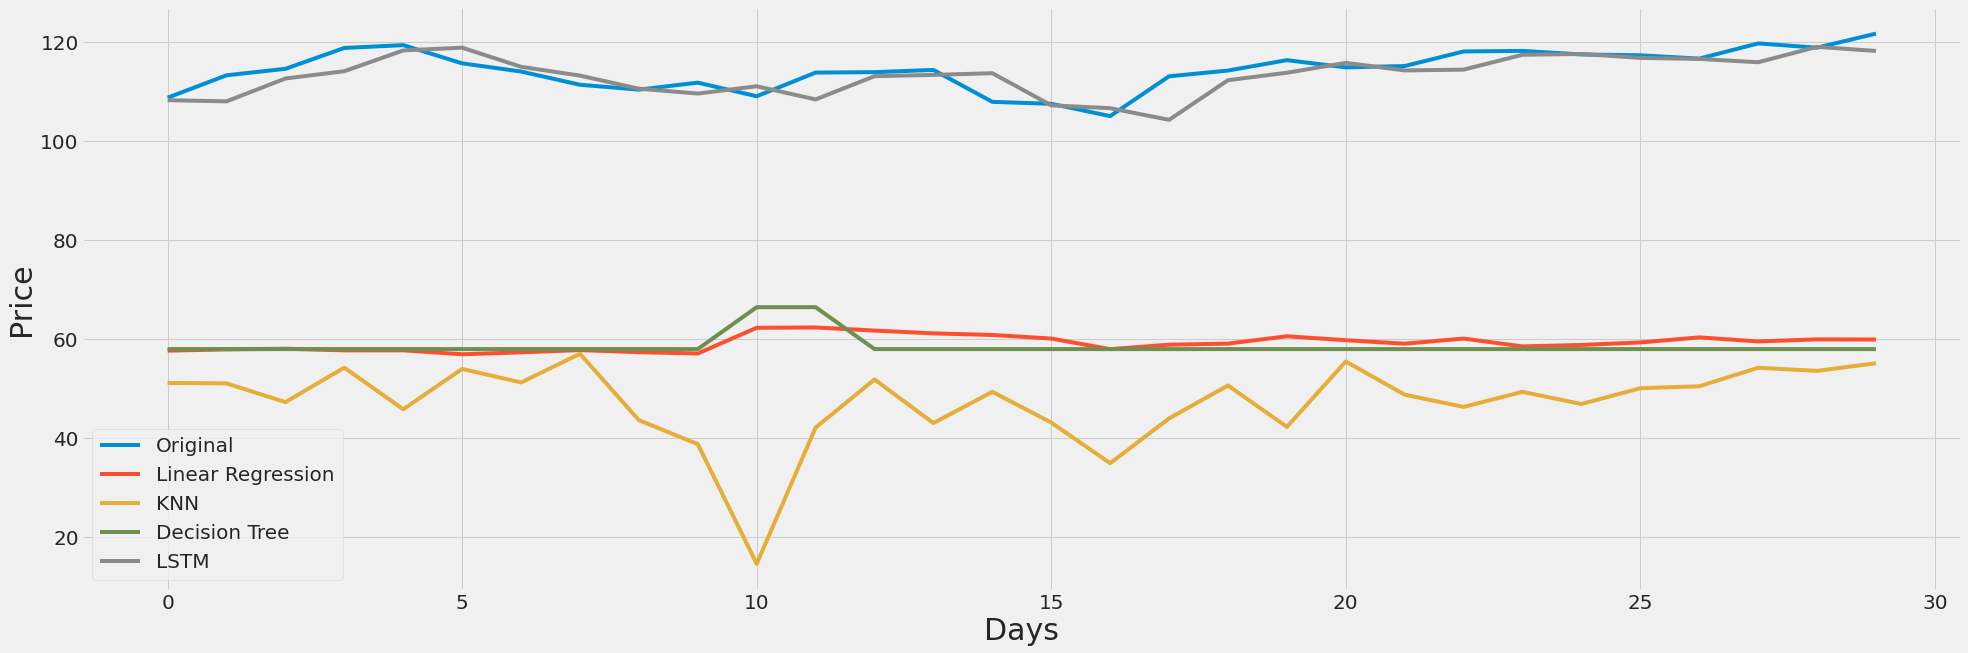

In [353]:
predictions['Original'].plot(figsize = (30,10), fontsize = 20)
predictions['Linear Regression'].plot(figsize = (30,10), fontsize = 20)
predictions['KNN'].plot(figsize = (30,10), fontsize = 20)
predictions['Decision Tree'].plot(figsize = (30,10), fontsize = 20)
predictions['LSTM'].plot(figsize = (30,10), fontsize = 20)
plt.legend(['Original','Linear Regression', 'KNN', 'Decision Tree', 'LSTM'], fontsize=20)
plt.xlabel('Days', fontsize = 30)
plt.ylabel('Price', fontsize = 30)
plt.show()

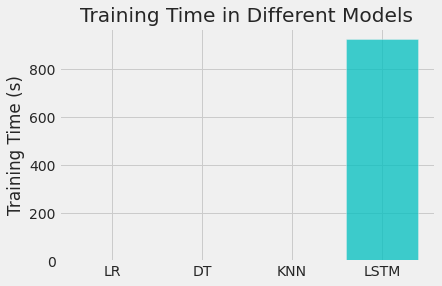

In [354]:
objects = ('LR', 'DT', 'KNN', 'LSTM')
y_pos = np.arange(len(objects))
performance = [time_lr, time_dt, time_knn, total_lstm]

plt.bar(y_pos, performance, align='center', color='c', alpha = 0.75)
plt.xticks(y_pos, objects)
plt.ylabel('Training Time (s)')
plt.title('Training Time in Different Models')

plt.show()

In [355]:
date= ['2022-03-03','2022-03-04','2022-03-05','2022-03-06','2022-03-09','2022-03-10','2022-03-11','2022-03-12','2022-03-13','2022-03-16',
       '2022-03-17','2022-03-18','2022-03-19','2022-03-20','2022-03-23','2022-03-24','2022-03-25','2022-03-26','2022-03-27','2022-03-30',
       '2022-03-31','2022-04-01','2022-04-02','2022-04-03','2022-04-06','2022-04-07','2022-04-08','2022-04-09','2022-04-13','2022-04-14',
       '2022-04-15','2022-04-16','2022-04-17','2022-04-20','2022-04-21','2022-04-22','2022-04-23','2022-04-24','2022-04-27','2022-04-28',]


In [356]:
days = [str(i) for i in date]

predictions = {'Original':original[10:41],
               'Linear Regression':lr.predict(X_old)[10:41],
              'KNN':knn.predict(X_old)[10:41],
              'Decision Tree':tree.predict(X_old)[10:41],
              'LSTM':lstm[10:41]}

predictions = pd.DataFrame(predictions)
print(days)
len(days)

['2022-03-03', '2022-03-04', '2022-03-05', '2022-03-06', '2022-03-09', '2022-03-10', '2022-03-11', '2022-03-12', '2022-03-13', '2022-03-16', '2022-03-17', '2022-03-18', '2022-03-19', '2022-03-20', '2022-03-23', '2022-03-24', '2022-03-25', '2022-03-26', '2022-03-27', '2022-03-30', '2022-03-31', '2022-04-01', '2022-04-02', '2022-04-03', '2022-04-06', '2022-04-07', '2022-04-08', '2022-04-09', '2022-04-13', '2022-04-14', '2022-04-15', '2022-04-16', '2022-04-17', '2022-04-20', '2022-04-21', '2022-04-22', '2022-04-23', '2022-04-24', '2022-04-27', '2022-04-28']


40

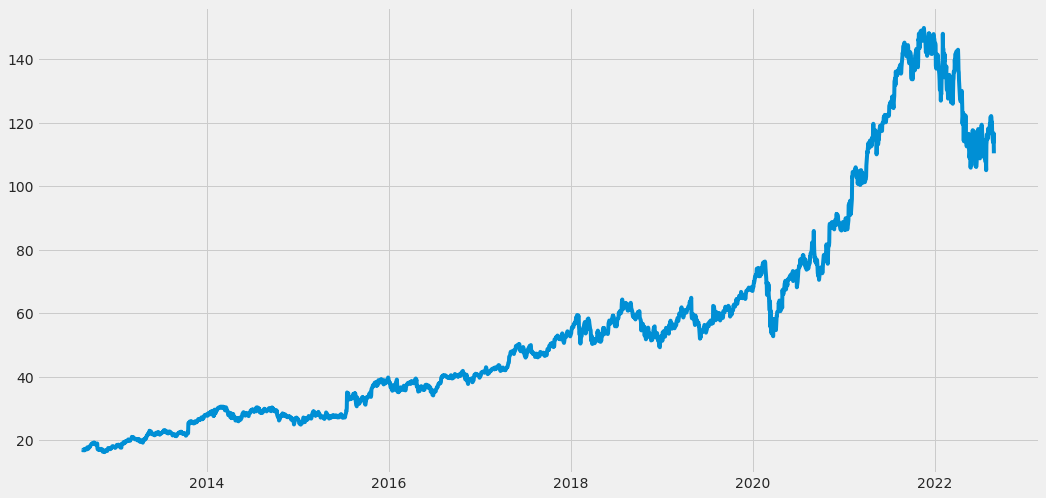

In [363]:
plt.figure(figsize=(16,8))
plt.plot(df["Close"], label='Closing Price')

In [364]:
data = df.sort_index(ascending=True, axis=0)
df2 = pd.DataFrame(index=range(0,len(df)), columns=['Date','Close'])
for i in range(0,len(data)):
    df2['Date'][i]=data.index[i]
    df2["Close"][i]=data["Close"][i]

In [365]:
df2

,Date,Close
0,2012-08-20 00:00:00,16.905405
1,2012-08-21 00:00:00,16.754505
2,2012-08-22 00:00:00,16.946445
3,2012-08-23 00:00:00,16.936937
4,2012-08-24 00:00:00,16.982733
...,...,...
2517,2022-08-22 00:00:00,114.239998
2518,2022-08-23 00:00:00,113.860001
2519,2022-08-24 00:00:00,113.690002
2520,2022-08-25 00:00:00,116.650002


In [366]:
df2["Date"]=pd.to_datetime(df2.Date,format="%Y-%m-%d")


In [367]:
df2

,Date,Close
0,2012-08-20,16.905405
1,2012-08-21,16.754505
2,2012-08-22,16.946445
3,2012-08-23,16.936937
4,2012-08-24,16.982733
...,...,...
2517,2022-08-22,114.239998
2518,2022-08-23,113.860001
2519,2022-08-24,113.690002
2520,2022-08-25,116.650002


In [368]:
scaler=MinMaxScaler(feature_range=(0,1))

In [369]:
length_df2 = len(df2)
train_length = int(length_df2*(70/100))

test_start = train_length+1
test_start

1766

In [370]:
final_dataset = df2.values

train_data=final_dataset[0:train_length,:]
valid_data=final_dataset[test_start:,:]

df2.index = df2.Date
df2.drop("Date",axis=1,inplace=True)

final_dataset = df2.values

In [371]:
df2

,Close
Date,
2012-08-20,16.905405
2012-08-21,16.754505
2012-08-22,16.946445
2012-08-23,16.936937
2012-08-24,16.982733
...,...
2022-08-22,114.239998
2022-08-23,113.860001
2022-08-24,113.690002


In [372]:
final_dataset

array([[16.905405044555664],
       [16.754505157470703],
       [16.94644546508789],
       ...,
       [113.69000244140625],
       [116.6500015258789],
       [110.33999633789062]], dtype=object)

In [373]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(final_dataset)
scaled_data

array([[0.00531049],
       [0.00418136],
       [0.00561758],
       ...,
       [0.72951407],
       [0.75166265],
       [0.7044472 ]])

In [374]:
x_train_data,y_train_data=[],[]
for i in range(60,len(train_data)):
    x_train_data.append(scaled_data[i-60:i,0])
    y_train_data.append(scaled_data[i,0])

In [375]:
x_train_data,y_train_data=np.array(x_train_data),np.array(y_train_data)

In [376]:
print(x_train_data.shape[0])

1705


In [377]:
x_train_data=np.reshape(x_train_data,(x_train_data.shape[0],x_train_data.shape[1],1))

In [378]:
x_train_data.shape[1]

60

In [379]:
#lstm model

lstm_model=Sequential()
lstm_model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train_data.shape[1],1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))

inputs_data=df2[len(df2)-len(valid_data)-60:].values
inputs_data=inputs_data.reshape(-1,1)
inputs_data=scaler.transform(inputs_data)


lstm_model.compile(loss='mean_squared_error',optimizer='adam')
lstm_model.fit(x_train_data,y_train_data,epochs=50,batch_size=10,verbose=2)

Epoch 1/50
171/171 - 12s - loss: 0.0016 - 12s/epoch - 70ms/step
Epoch 2/50
171/171 - 8s - loss: 9.8590e-05 - 8s/epoch - 46ms/step
Epoch 3/50
171/171 - 8s - loss: 9.8708e-05 - 8s/epoch - 45ms/step
Epoch 4/50
171/171 - 8s - loss: 9.7191e-05 - 8s/epoch - 46ms/step
Epoch 5/50
171/171 - 8s - loss: 8.1727e-05 - 8s/epoch - 45ms/step
Epoch 6/50
171/171 - 8s - loss: 9.5140e-05 - 8s/epoch - 45ms/step
Epoch 7/50
171/171 - 8s - loss: 8.0397e-05 - 8s/epoch - 49ms/step
Epoch 8/50
171/171 - 8s - loss: 7.8783e-05 - 8s/epoch - 46ms/step
Epoch 9/50
171/171 - 8s - loss: 7.6085e-05 - 8s/epoch - 46ms/step
Epoch 10/50
171/171 - 8s - loss: 6.9923e-05 - 8s/epoch - 46ms/step
Epoch 11/50
171/171 - 8s - loss: 6.7740e-05 - 8s/epoch - 45ms/step
Epoch 12/50
171/171 - 9s - loss: 6.9614e-05 - 9s/epoch - 51ms/step
Epoch 13/50
171/171 - 8s - loss: 6.9674e-05 - 8s/epoch - 47ms/step
Epoch 14/50
171/171 - 8s - loss: 6.3347e-05 - 8s/epoch - 47ms/step
Epoch 15/50
171/171 - 9s - loss: 7.3399e-05 - 9s/epoch - 53ms/step
Epoch 

In [380]:
X_test=[]
for i in range(60,inputs_data.shape[0]):
    X_test.append(inputs_data[i-60:i,0])
X_test=np.array(X_test)

In [381]:
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
predicted_closing_price=lstm_model.predict(X_test)
predicted_closing_price=scaler.inverse_transform(predicted_closing_price)

In [382]:
lstm_model.save("saved_model.h5")

In [383]:
predicted_closing_price.shape

(756, 1)

In [384]:
type(valid_data)

numpy.ndarray

In [385]:
(train_data)

array([[Timestamp('2012-08-20 00:00:00'), 16.905405044555664],
       [Timestamp('2012-08-21 00:00:00'), 16.754505157470703],
       [Timestamp('2012-08-22 00:00:00'), 16.94644546508789],
       ...,
       [Timestamp('2019-08-22 00:00:00'), 59.57600021362305],
       [Timestamp('2019-08-23 00:00:00'), 57.67900085449219],
       [Timestamp('2019-08-26 00:00:00'), 58.558998107910156]],
      dtype=object)

In [386]:
train_data=df2[:2200]
valid_data=df2[2201:]
train_data=final_dataset[0:train_length,:]
valid_data=final_dataset[test_start:,:]
predicted_closing_price = np.array(predicted_closing_price)

#new_data = pd.DataFrame({
#'Close' : X_test,
#'Pred'  : predicted_closing_price })


#valid_data['Predictions']=predicted_closing_price
#plt.plot(train_data["Close"])
#plt.plot(new_data[['Close',"Predictions"]])

In [387]:
df3= df2.copy(deep=True)
df3 = df3[test_start:]
df3.shape

(756, 1)

In [388]:
df3['Pred'] = predicted_closing_price

In [389]:
df3

,Close,Pred
Date,,
2019-08-28,58.6875,58.792538
2019-08-29,59.712002,58.982037
2019-08-30,59.526501,60.062469
2019-09-03,58.477501,59.718479
2019-09-04,59.113499,58.623558
...,...,...
2022-08-22,114.239998,112.836327
2022-08-23,113.860001,111.270683
2022-08-24,113.690002,111.767395


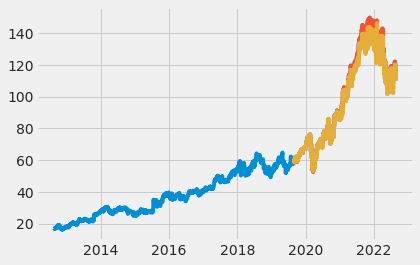

In [390]:
plt.plot(df2['Close'])
plt.plot(df3[['Close',"Pred"]])

In [391]:
X_test.shape

(756, 60, 1)

In [392]:
predicted_closing_price.shape

(756, 1)

In [393]:
df3

,Close,Pred
Date,,
2019-08-28,58.6875,58.792538
2019-08-29,59.712002,58.982037
2019-08-30,59.526501,60.062469
2019-09-03,58.477501,59.718479
2019-09-04,59.113499,58.623558
...,...,...
2022-08-22,114.239998,112.836327
2022-08-23,113.860001,111.270683
2022-08-24,113.690002,111.767395


In [394]:
from numpy import sqrt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, mean_squared_error
print (sqrt(mean_squared_error( df3['Close'] , df3['Pred'] )) )

3.674849220385474


In [395]:
import math
from sklearn.metrics import mean_squared_error, r2_score

testScore = math.sqrt(mean_squared_error(df3['Close'] , df3['Pred'] ))
print('Root Mean Square Error Score: %.2f RMSE' % (testScore))

r2 = r2_score(df3['Close'] , df3['Pred'])
print ('R2 score: %.2f R2' %(r2))


Root Mean Square Error Score: 3.67 RMSE
R2 score: 0.98 R2


In [396]:
df2

,Close
Date,
2012-08-20,16.905405
2012-08-21,16.754505
2012-08-22,16.946445
2012-08-23,16.936937
2012-08-24,16.982733
...,...
2022-08-22,114.239998
2022-08-23,113.860001
2022-08-24,113.690002


In [397]:
valid_data

array([[58.6875],
       [59.71200180053711],
       [59.5265007019043],
       [58.477500915527344],
       [59.11349868774414],
       [60.609500885009766],
       [60.316001892089844],
       [60.26350021362305],
       [60.28499984741211],
       [61.0],
       [61.74850082397461],
       [62.00149917602539],
       [61.58150100708008],
       [61.49399948120117],
       [61.63249969482422],
       [61.9375],
       [61.492000579833984],
       [61.734500885009766],
       [60.916500091552734],
       [62.297000885009766],
       [62.114498138427734],
       [61.29750061035156],
       [61.05699920654297],
       [60.29999923706055],
       [58.895999908447266],
       [59.471500396728516],
       [60.54800033569336],
       [60.412498474121094],
       [59.506500244140625],
       [60.119998931884766],
       [60.4734992980957],
       [60.785499572753906],
       [60.88850021362305],
       [62.11199951171875],
       [62.150001525878906],
       [62.63999938964844],
       [62.2

In [398]:
from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

plotdf = pd.DataFrame({'date': df2.index,
                       'original_close': df3['Close'],
                       'train_predicted_close' : df2['Close'],
                      'test_predicted_close': df3['Pred']})

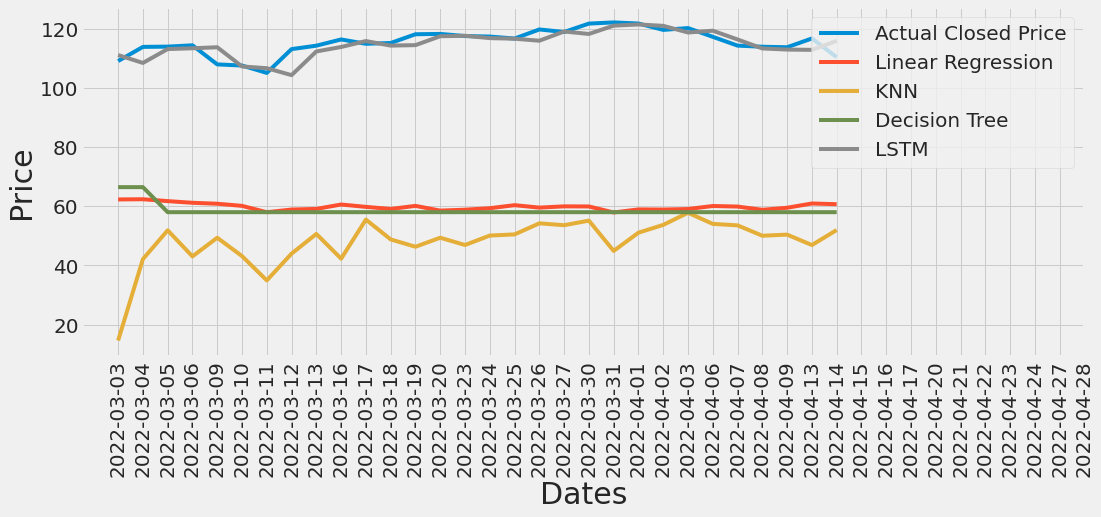

<Figure size 432x288 with 0 Axes>

In [ ]:
predictions['Original'].plot(figsize = (30,10), fontsize = 20)
predictions['Linear Regression'].plot(figsize = (30,10), fontsize = 20)
predictions['KNN'].plot(figsize = (30,10), fontsize = 20)
predictions['Decision Tree'].plot(figsize = (30,10), fontsize = 20)
predictions['LSTM'].plot(figsize = (30,10), fontsize = 20)
plt.legend(['Actual Closed Price','Linear Regression', 'KNN', 'Decision Tree', 'LSTM'], fontsize=20)

bars = days
y_pos = np.arange(len(bars))
 
# Create names
plt.xticks(y_pos, bars)
plt.xticks(rotation=90)


plt.xlabel('Dates', fontsize = 30)
plt.ylabel('Price', fontsize = 30)


fig = plt.gcf()
fig.set_size_inches(16,6)


plt.show()

plt.savefig("High resoltion.png",dpi=300)

In [399]:
title_variable = " " + 'GOOGL' +" Stock Prediction"

fig = px.line(plotdf,x=plotdf['date'], y=plotdf['original_close'], title=title_variable)
fig.add_traces(
    list(px.line(plotdf,x='date', y='test_predicted_close', color_discrete_sequence = ['red'] ).select_traces() )
)

fig.add_traces(
    list(px.line(plotdf,x='date', y='train_predicted_close' , color_discrete_sequence = ['green']).select_traces() )
)


fig.update_layout(
    xaxis_title="Date",
    yaxis_title="Close",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="RebeccaPurple"
    )
)

fig.update_traces(marker=dict(size=12, line=dict(width=2, color='DarkSlateGrey')), selector=dict(mode='markers'))
fig.show()

# **RMSE:- 3.67**
# **R square:- 0.98**